In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


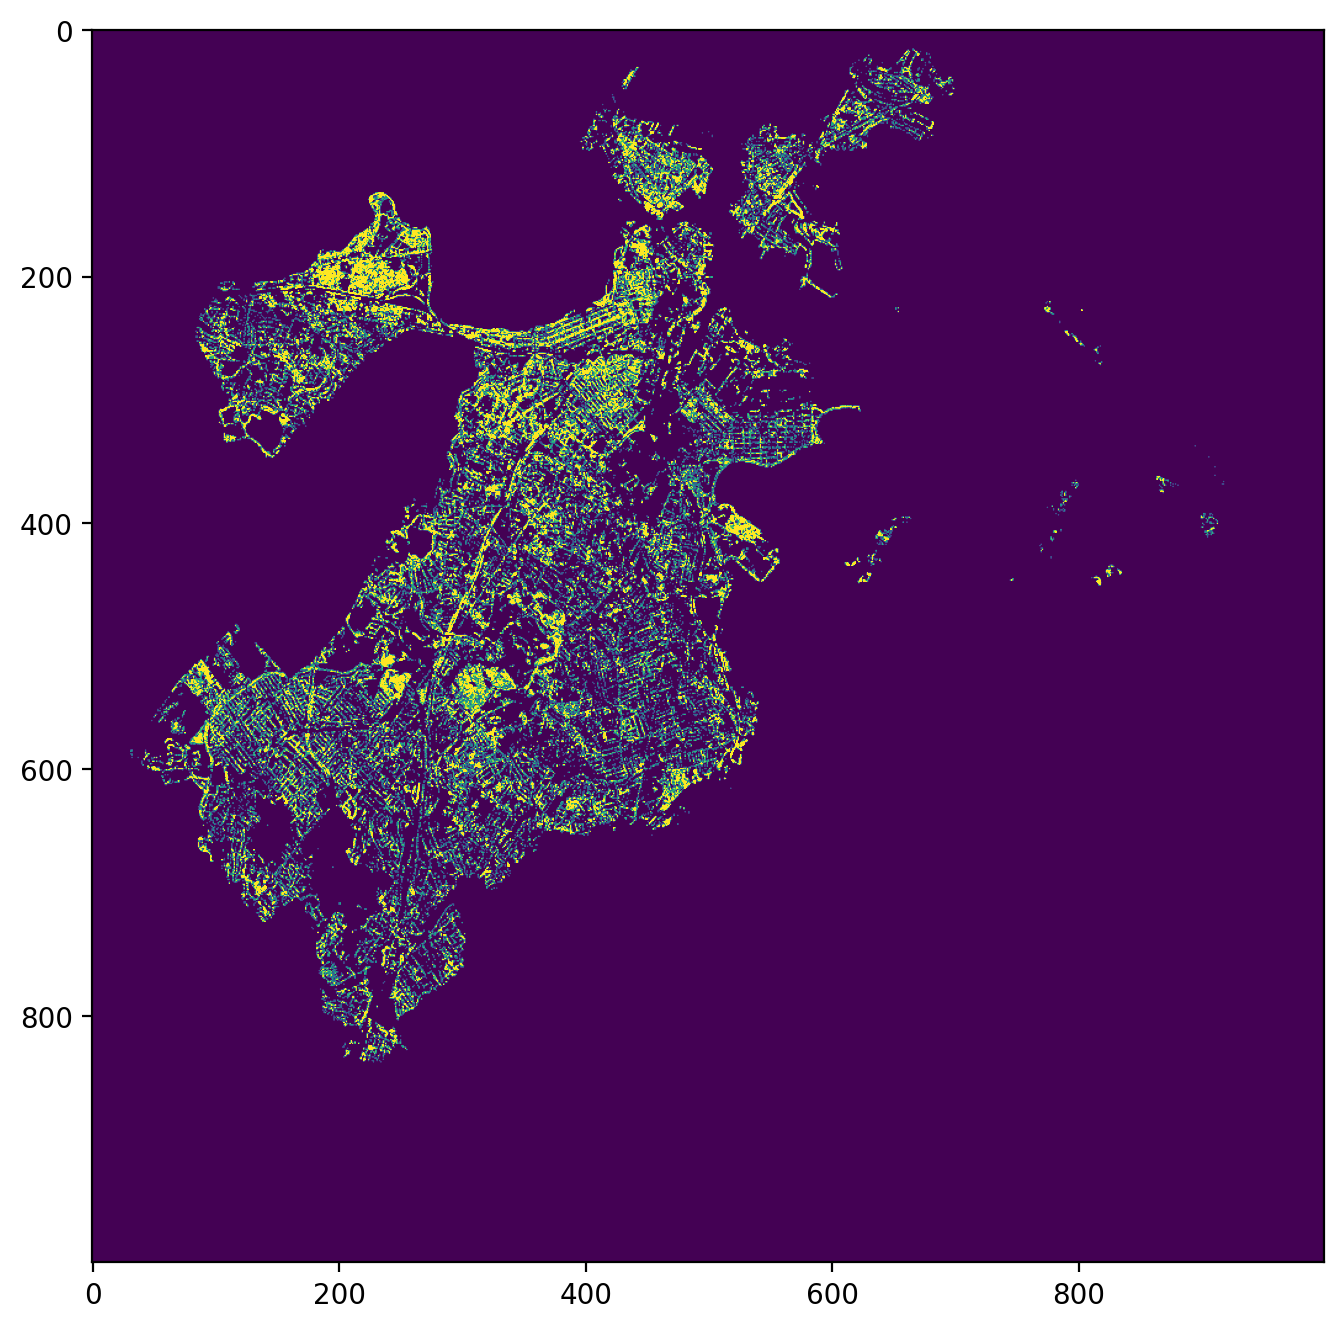

In [3]:
trees = pd.read_csv('trees.csv')

# rename X and Y columns to longitude and latitude, respectively
trees = trees.rename(columns={'X':'LONGITUDE'})
trees = trees.rename(columns={'Y':'LATITUDE'})

# drop the objectid and type columns
trees = trees.drop(columns=['OBJECTID', 'TYPE'])

min_longitude = -71.2
max_longitude = -70.9
min_latitude = 42.2
max_latitude = 42.4

# ((longitude - min) / (max - min)) * 999 to scale to 0-999
scaled_longitudes = ((trees['LONGITUDE'] - min_longitude) /  (max_longitude - min_longitude)) * 1000.0
trees['LONGITUDE'] = scaled_longitudes

# ((min - latitude) / (max - min)) * 999 to scale to 0-999
scaled_latitudes = ((min_latitude - trees['LATITUDE']) /  (max_latitude - min_latitude)) * 1000.0
trees['LATITUDE'] = scaled_latitudes

# round to ints
trees['LONGITUDE'] = trees['LONGITUDE'].round().astype(int)
trees['LATITUDE'] = trees['LATITUDE'].round().astype(int)

# assign the values to a numpy array
trees_array = trees.values

# populate a new 1000x1000 with zeros
boston_map = np.zeros((1000, 1000), dtype=int)

# find corresponding longitude and latitude cell of every tree in the data set and keep count of the number of trees
# in each cell
for tree in trees_array:
    longitude = tree[0]
    latitude = tree[1]
    
    boston_map[latitude][longitude] += 1

plt.figure(figsize=(8, 8), dpi=200)
plt.imshow(boston_map, cmap='viridis', vmax=3)